In [93]:
include("xd.jl")
T = 12 * 40

480

In [94]:
bounds_param = 1/1000
N_param = 0.25

# Liczba agentów rodzaju I
Nᴵ = round(Int, 5000 * N_param)
# Liczba agentów rodzaju II
Nᴵᴵ = round(Int, 25000 * N_param) 
# Liczba agentów rodzaju III
Nᴵᴵᴵ = round(Int, 50000 * N_param)  # SUMA 80000 (8*10^4)
#Ceny
P_górna⁽¹⁾ = round(Int, 35000 * bounds_param)
P_górna⁽²⁾ = round(Int, 25000 * bounds_param)
P_dolna⁽¹⁾ = round(Int, 23000 * bounds_param)
P_górna⁽³⁾ = round(Int, 19000 * bounds_param)
P_dolna⁽²⁾ = round(Int, 18000 * bounds_param)
P_dolna⁽³⁾ = round(Int, 8000 * bounds_param)
# Define the truncated Pareto distribution

#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)


CZAS = 12 * 15 #Piętnastoletnie ,,pożyczki" - zablokowanie czasu do szukania nowego mieszkania (można szukać tylko gdy CZASₙ = 0);



180

## Wizualizacja uciętych rozkładów Pareto

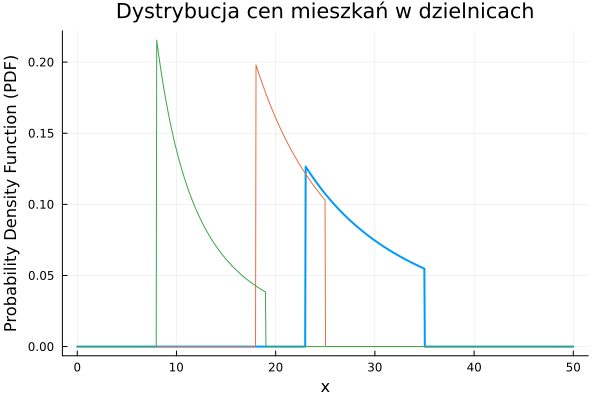

In [95]:
d1 = truncated(Pocz_rozk_I, P_dolna⁽¹⁾, P_górna⁽¹⁾)
d2 = truncated(Pocz_rozk_I, P_dolna⁽²⁾, P_górna⁽²⁾)
d3 = truncated(Pocz_rozk_I, P_dolna⁽³⁾, P_górna⁽³⁾)


# Generate a range of x values
x = range(0, stop=50, length=1000)

# Compute the PDF at each x value
y1 = pdf.(d1, x)
y2 = pdf.(d2, x)
y3 = pdf.(d3, x)

przyrost_2 = pdf.(Pocz_rozk_II*P_górna⁽²⁾*0.025,x)

# Create the plot
plot(x, y1, 
    xlabel="x", 
    ylabel="Probability Density Function (PDF)", 
    title= "Dystrybucja cen mieszkań w dzielnicach", 
    legend=false,
    linewidth=2)
plot!(x, y2)
plot!(x, y3) 


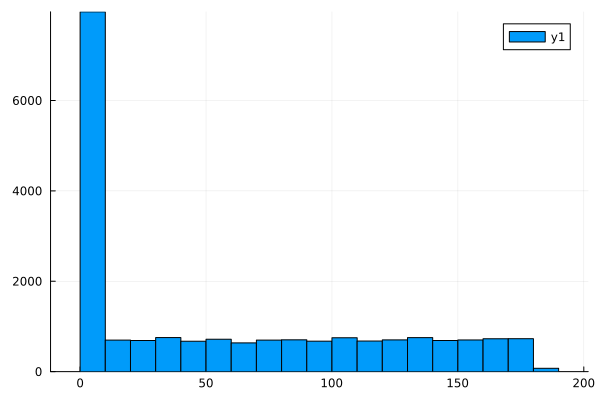

In [96]:
histogram(AGENCI[:,5,2])
# Ludziom dług znika!!!
# AGENCI[1:20,5,2:3]

AGENCI
1. wymiar - nr agenta
2. wymiar
    * 1 kolumna - dzielnica
    * 2 kolumna - majątek
    * 3 kolumna - cena mieszkanie
    * 4 kolumna - lokalizacja ????
    * 5 kolumna - dlug
3. wymiary - czas

In [97]:
# using XLSX
# XLSX.writetable("agent_example3.xlsx", DataFrame(AGENCI[1,:,:], :auto))

rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))


18.381513634702433

In [98]:
AGENCI = schelling_sym();

In [99]:
# using XLSX
# XLSX.writetable("agent_example_5.xlsx", DataFrame(, :auto))

transpose(AGENCI[(AGENCI[:,1,1] .== 3),5,1:4])

4×12500 transpose(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  159.0  52.0  180.0  1.0  …  0.0  29.0  164.0  58.0  77.0  0.0
 0.0  0.0  160.0  53.0    0.0  2.0     0.0  30.0  165.0  59.0  78.0  0.0
 0.0  0.0  161.0  54.0    0.0  3.0     0.0  31.0  166.0  60.0  79.0  0.0
 0.0  0.0  162.0  55.0    0.0  4.0     0.0  32.0  167.0  61.0  80.0  0.0

## Na podstawie array AGENCI:
* Wykres udziałów dzielnicy według ludzi w niej zamieszkającej (procent całoście per dzielnica - 3 wykresy)
* Wykres udziałów dla wszystkich dzielnic jednocześnie (1)
* Wykresy zmian procentów per dzielnica (3 wykresy)

to będzie baza do dalszych wykresów, jak zwiększymy ilość agentów to będzie to wykorzystywane do analizy wrażliwości

In [100]:
# using DataFrames
dzielnice_counts_df = DataFrame()

for t in 1:T
    to_count = string.(AGENCI[:,1:1,t])
    counts = countmap(to_count)
    # print(t)
    for key in ["1.0", "2.0", "3.0"]
        if !(key in keys(counts))
            counts[key] = 0
        end 
    end
    if t == 1
        dzielnice_counts_df = DataFrame(counts)
    else
        tmp_df = DataFrame(copy(counts))
        dzielnice_counts_df = vcat(dzielnice_counts_df,tmp_df)
    end
end

dzielnice_counts_df[!,:RowSum] = [sum(row) for row in eachrow(dzielnice_counts_df)];

rename!(dzielnice_counts_df, Dict(:1 => :district_1));
rename!(dzielnice_counts_df, Dict(:2 => :district_2));
rename!(dzielnice_counts_df, Dict(:3 => :district_3));

In [101]:
dzielnice_counts_df[:,["district_1","district_2","district_3"]]

Row,district_1,district_2,district_3
,Int64,Int64,Int64
1,1250,6250,12500
2,1250,6250,12500
3,1256,6244,12500
4,1263,6237,12500
5,1271,6229,12500
6,1275,6225,12500
7,1277,6223,12500
8,1278,6222,12500
9,1279,6221,12500


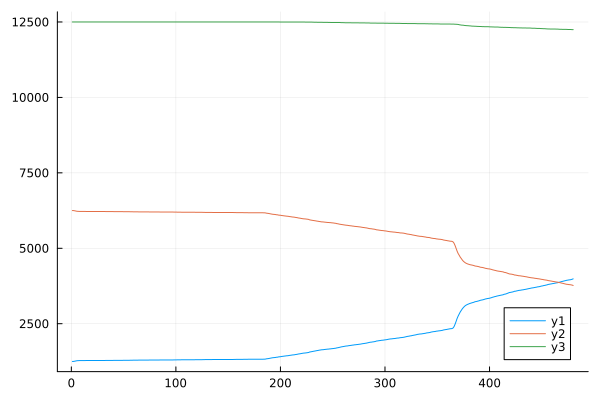

In [102]:

plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")
# AGENCI[(AGENCI[:,1,3] .== 0.0),:,1:10][1,:,:]

In [103]:
# Apply the function to add a new column with log returns
function percent_change!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_pct"))] = [missing; diff(df[!, column])./ df[1:end-1, column]]
end

cols = names(dzielnice_counts_df)

# Apply the function to add a new column with percent change and log returns
for col in cols
    percent_change!(dzielnice_counts_df, col)
end

dzielnice_counts_df[!,:district_1_shr] = dzielnice_counts_df[:, :district_1] ./ dzielnice_counts_df[:, :RowSum]
dzielnice_counts_df[!,:district_2_shr] = dzielnice_counts_df[:, :district_2] ./ dzielnice_counts_df[:, :RowSum]
dzielnice_counts_df[!,:district_3_shr] = dzielnice_counts_df[:, :district_3] ./ dzielnice_counts_df[:, :RowSum]



480-element Vector{Float64}:
 0.625
 0.625
 0.625
 0.625
 0.625
 0.625
 0.625
 0.625
 0.625
 0.625
 ⋮
 0.6128
 0.6128
 0.6127
 0.6126
 0.6126
 0.61255
 0.6125
 0.61235
 0.6123

In [104]:
dzielnice_counts_df

Row,district_1,district_2,district_3,RowSum,district_1_pct,district_2_pct,district_3_pct,RowSum_pct,district_1_shr,district_2_shr,district_3_shr
,Int64,Int64,Int64,Int64,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64
1,1250,6250,12500,20000,missing,missing,missing,missing,0.0625,0.3125,0.625
2,1250,6250,12500,20000,0.0,0.0,0.0,0.0,0.0625,0.3125,0.625
3,1256,6244,12500,20000,0.0048,-0.00096,0.0,0.0,0.0628,0.3122,0.625
4,1263,6237,12500,20000,0.00557325,-0.00112108,0.0,0.0,0.06315,0.31185,0.625
5,1271,6229,12500,20000,0.00633413,-0.00128267,0.0,0.0,0.06355,0.31145,0.625
6,1275,6225,12500,20000,0.00314713,-0.000642158,0.0,0.0,0.06375,0.31125,0.625
7,1277,6223,12500,20000,0.00156863,-0.000321285,0.0,0.0,0.06385,0.31115,0.625
8,1278,6222,12500,20000,0.000783085,-0.000160694,0.0,0.0,0.0639,0.3111,0.625
9,1279,6221,12500,20000,0.000782473,-0.00016072,0.0,0.0,0.06395,0.31105,0.625


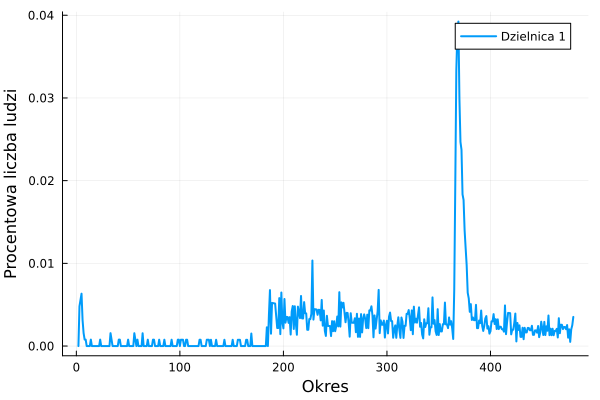

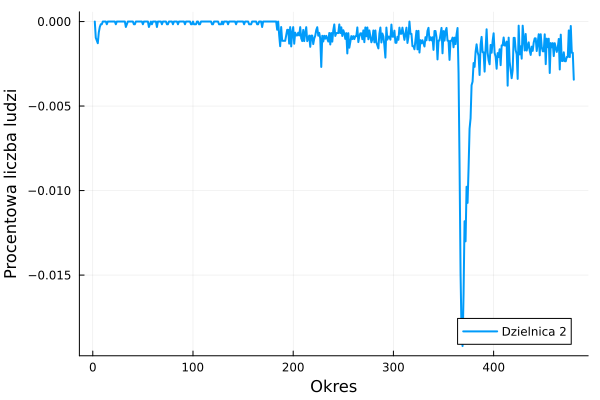

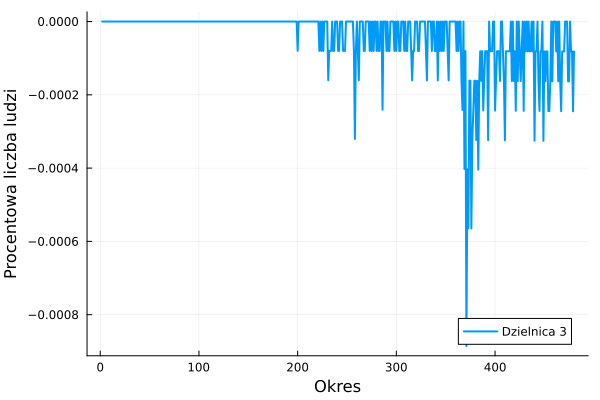

In [105]:
# Wykresy udziałów dzielnicy według ludzi w niej zamieszkającej
district_1_plot = plot(dzielnice_counts_df[!,:district_1_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 1", linewidth=2)
district_2_plot = plot(dzielnice_counts_df[!,:district_2_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 2", linewidth=2)
district_3_plot = plot(dzielnice_counts_df[!,:district_3_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 3", linewidth=2)

display(district_1_plot)
display(district_2_plot)
display(district_3_plot)


#cos nie wyglada dobrze dla 2 dzielnicy

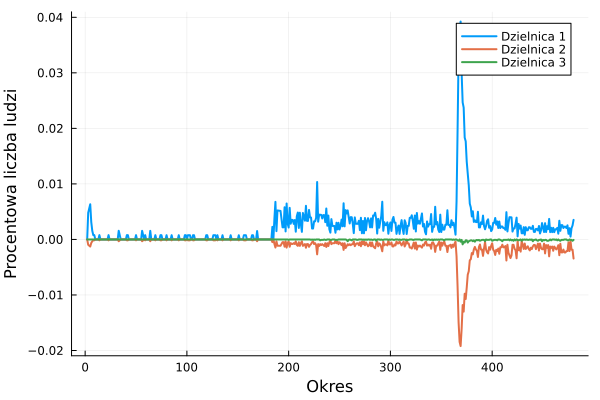

In [106]:
# Wykres udziałów dla wszystkich dzielnic jednocześnie
all_districts_plot = plot(dzielnice_counts_df[!,:district_1_pct], label="Dzielnica 1", linewidth=2)
plot!(dzielnice_counts_df[!,:district_2_pct], label="Dzielnica 2", linewidth=2)
plot!(dzielnice_counts_df[!,:district_3_pct], label="Dzielnica 3", linewidth=2)
xlabel!("Okres")
ylabel!("Procentowa liczba ludzi")

display(all_districts_plot)

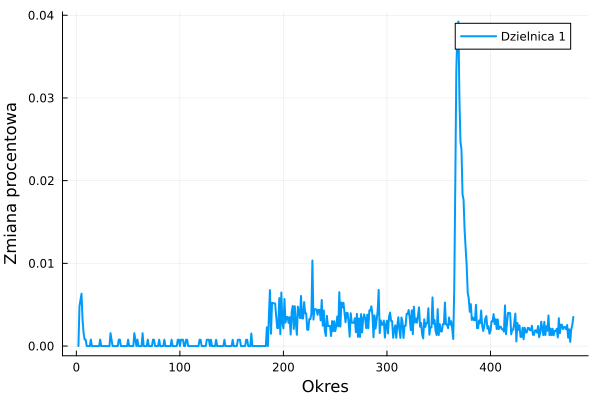

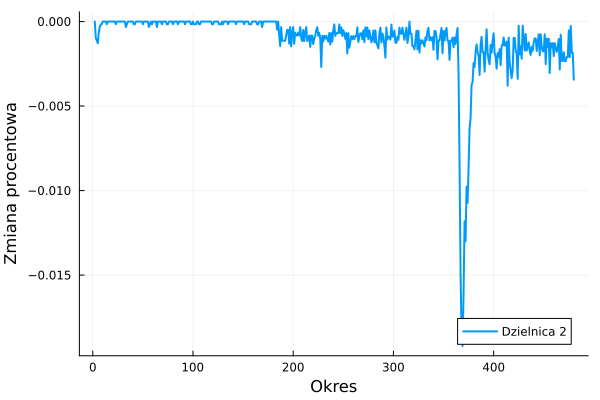

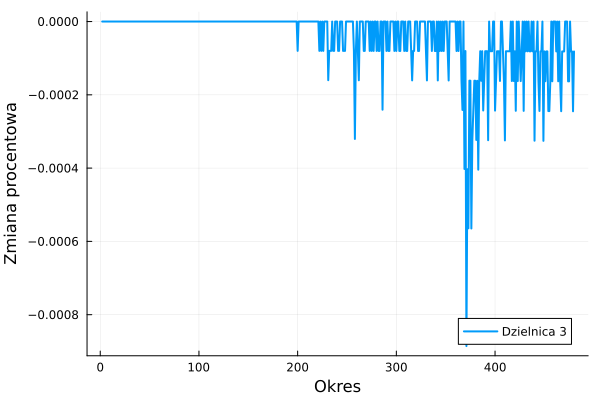

In [107]:
# Wykresy zmian procentowych per dzielnica
district_1_change_plot = plot(dzielnice_counts_df[!,:district_1_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 1", linewidth=2)
district_2_change_plot = plot(dzielnice_counts_df[!,:district_2_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 2", linewidth=2)
district_3_change_plot = plot(dzielnice_counts_df[!,:district_3_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 3", linewidth=2)

display(district_1_change_plot)
display(district_2_change_plot)
display(district_3_change_plot)

## Skumulowany dług

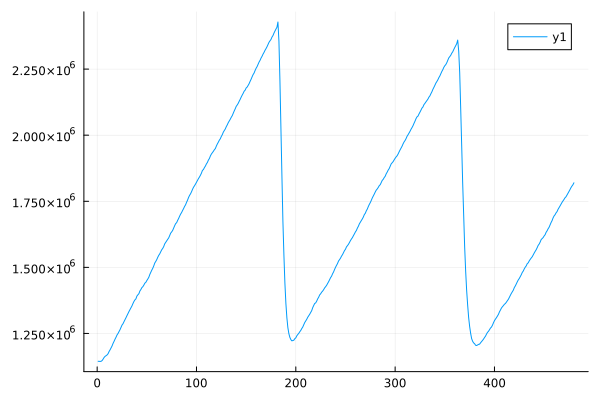

In [108]:
#WTFy xD - bedzie trzeba to zbadać
CZAS_SUMS = sum(AGENCI[:,5,:], dims = 1);
dlug_df = DataFrame(transpose(CZAS_SUMS), :auto)
plot(dlug_df.x1)
## Wielka spłata długu

## Analiza wrażliwości

### Wstęp - funkcja

In [109]:
# Perform one simulation
AGENCI = schelling_sym();

In [110]:
## Calc counts
dzielnice_counts_df = calc_counts(AGENCI)

Row,district_1,district_2,district_3,RowSum,district_1_pct,district_2_pct,district_3_pct,RowSum_pct,district_1_shr,district_2_shr,district_3_shr
,Int64,Int64,Int64,Int64,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64
1,1250,6250,12500,20000,missing,missing,missing,missing,0.0625,0.3125,0.625
2,1250,6250,12500,20000,0.0,0.0,0.0,0.0,0.0625,0.3125,0.625
3,1254,6246,12500,20000,0.0032,-0.00064,0.0,0.0,0.0627,0.3123,0.625
4,1259,6241,12500,20000,0.00398724,-0.000800512,0.0,0.0,0.06295,0.31205,0.625
5,1261,6239,12500,20000,0.00158856,-0.000320461,0.0,0.0,0.06305,0.31195,0.625
6,1264,6236,12500,20000,0.00237906,-0.000480846,0.0,0.0,0.0632,0.3118,0.625
7,1269,6231,12500,20000,0.0039557,-0.000801796,0.0,0.0,0.06345,0.31155,0.625
8,1269,6231,12500,20000,0.0,0.0,0.0,0.0,0.06345,0.31155,0.625
9,1269,6231,12500,20000,0.0,0.0,0.0,0.0,0.06345,0.31155,0.625


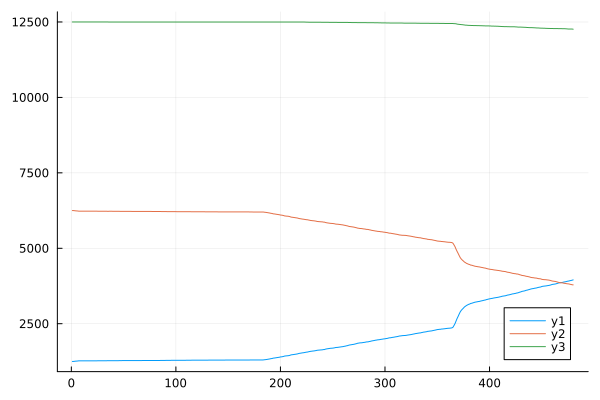

In [111]:
plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")

## Siatka parametrów

In [112]:
# Initialize an empty dictionary
dict_params = Dict()

id = 1
len = length(range(0.4, 4.2, step=0.2))
for i in range(0.4, 4.2, step=0.2)
    # Create a tuple with parameters
    param_tuple = (
        α₁ = 1.0 * i,
        θ₁ = 0.1,
        α₂ = 2.0 * i,
        θ₂ = 0.1,
        α₃ = 5.0 * i,
        θ₃ = 0.1
    )
    # Add the tuple as a key with an empty array as its value
    dict_params[id] = param_tuple
    id +=1
end

df_params = DataFrame([value for (key, value) in dict_params])


Row,α₁,θ₁,α₂,θ₂,α₃,θ₃
,Float64,Float64,Float64,Float64,Float64,Float64
1,1.2,0.1,2.4,0.1,6.0,0.1
2,3.4,0.1,6.8,0.1,17.0,0.1
3,4.2,0.1,8.4,0.1,21.0,0.1
4,2.6,0.1,5.2,0.1,13.0,0.1
5,1.8,0.1,3.6,0.1,9.0,0.1
6,3.6,0.1,7.2,0.1,18.0,0.1
7,0.4,0.1,0.8,0.1,2.0,0.1
8,4.0,0.1,8.0,0.1,20.0,0.1
9,1.4,0.1,2.8,0.1,7.0,0.1


Warning performing SA!

### Zapisywanie wyników

In [113]:
dict_sa = Dict()

for (key, params) in dict_params
    dict_sa[key] = schelling_sym(
        0.25,                # N_param
        1/1000,              # bounds_param
        params.α₁,           # param1
        params.θ₁,           # param2
        params.α₂,           # param3
        params.θ₂,           # param4
        params.α₃,           # param5
        params.θ₃,           # param6
        12 * 40,             # T
        0.1                  # przyrost_param
    )
    println(params.α₁)
     # Explicitly clear memory if possible
     GC.gc()  # Trigger garbage collection to free up memory
end

1.2
3.4
4.2
2.6
1.8
3.6
0.4
4.0
1.4
2.4
2.0
3.0
0.8
1.6
1.0
2.8
3.2
0.6
2.2
3.8


In [114]:
# using JLD2
# @save "workspace.jld2" dict_sa
# @load "workspace.jld2"

## Analiza wrażliwości wykres

In [115]:
counts_dict = Dict()

for (id, value) in dict_sa
    counts_dict[id] = calc_counts(value)
end

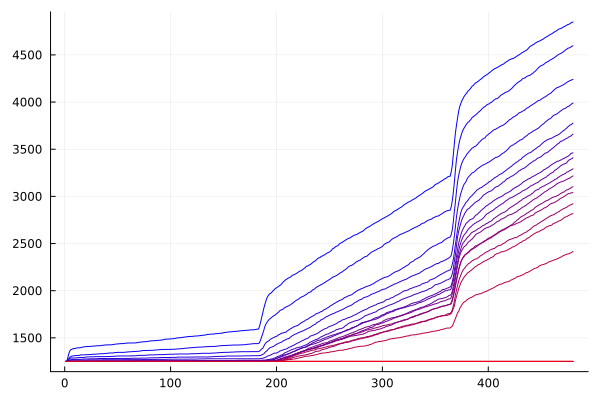

In [116]:
using Plots

num_colors = len
colors = [RGB(i/(num_colors-1), 0.0, 1.0 - i/(num_colors-1)) for i in 0:num_colors-1]

# colors = {key => colors for key in range(0.5, 2, step=0.1)}

p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_1, label="District 1", color=colors[key])
    ii +=1
end

display(p)

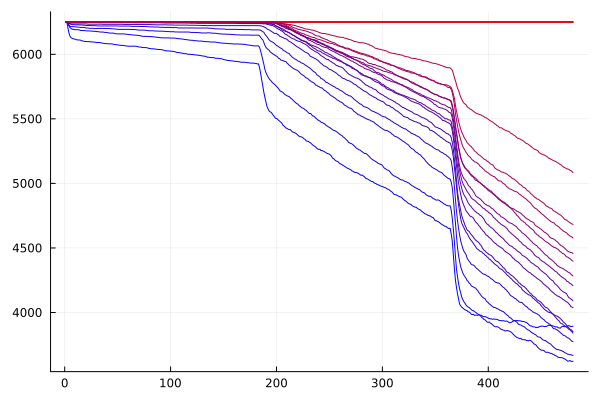

In [117]:
p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_2, label="District 2", color=colors[key])
    ii +=1
end

display(p)

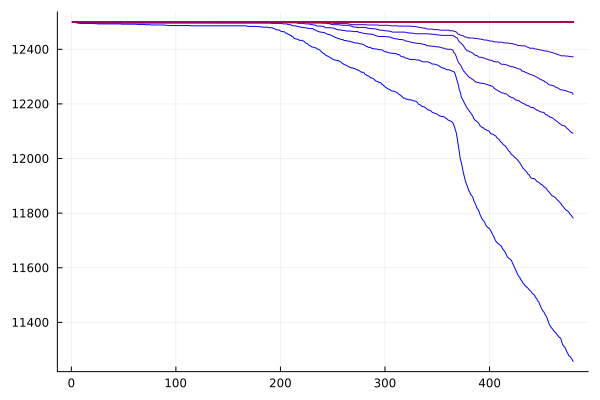

In [118]:
p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_3, label="District 3", color=colors[key])
    ii +=1
end

display(p)